In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_excel("/cleaned_air_quality.xlsx")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df = pd.read_excel("/cleaned_air_quality.xlsx")

In [ ]:
df.head()
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,14.1,59.85,133.0,NaN,1990-06-01
1,151,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,5.6,11.8,36.90,82.0,NaN,1990-06-01
2,152,June - M061990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.3,19.3,49.95,111.0,NaN,1990-06-01
3,150,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.9,8.2,53.10,118.0,NaN,1990-07-01
4,152,July - M071990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",3.5,12.1,60.75,135.0,NaN,1990-07-01


In [ ]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(422653, 12)

In [ ]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422653 entries, 0 to 422652
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     281609 non-null  object        
 1   sampling_date                422653 non-null  object        
 2   state                        422653 non-null  object        
 3   location                     422653 non-null  object        
 4   agency                       276768 non-null  object        
 5   type                         422653 non-null  object        
 6   so2                          422653 non-null  float64       
 7   no2                          422653 non-null  float64       
 8   rspm                         422653 non-null  float64       
 9   spm                          422653 non-null  float64       
 10  location_monitoring_station  402782 non-null  object        
 11  date                      

In [ ]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

,0
stn_code,141044
sampling_date,0
state,0
location,0
agency,145885
type,0
so2,0
no2,0
rspm,0
spm,0


In [ ]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,so2,no2,rspm,spm,date
count,422653.000000,422653.000000,422653.000000,422653.000000,422649
mean,10.441944,25.575205,108.868297,235.214108,2010-04-07 13:24:15.531185664
min,0.000000,0.000000,0.000000,0.000000,1987-01-01 00:00:00
25%,4.500000,14.000000,56.000000,120.000000,2007-09-07 00:00:00
50%,7.800000,21.700000,90.000000,195.555556,2010-12-28 00:00:00
75%,13.000000,32.000000,142.000000,312.000000,2013-09-28 00:00:00
max,909.000000,876.000000,6307.033333,2862.222222,2015-12-31 00:00:00
std,10.878503,18.310815,74.816330,160.257725,NaN


In [ ]:
df.nunique()
# These are all the unique values present in the dataframe

,0
stn_code,743
sampling_date,5477
state,34
location,298
agency,60
type,4
so2,16168
no2,10458
rspm,6959
spm,10184


In [ ]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'date'],
      dtype='object')

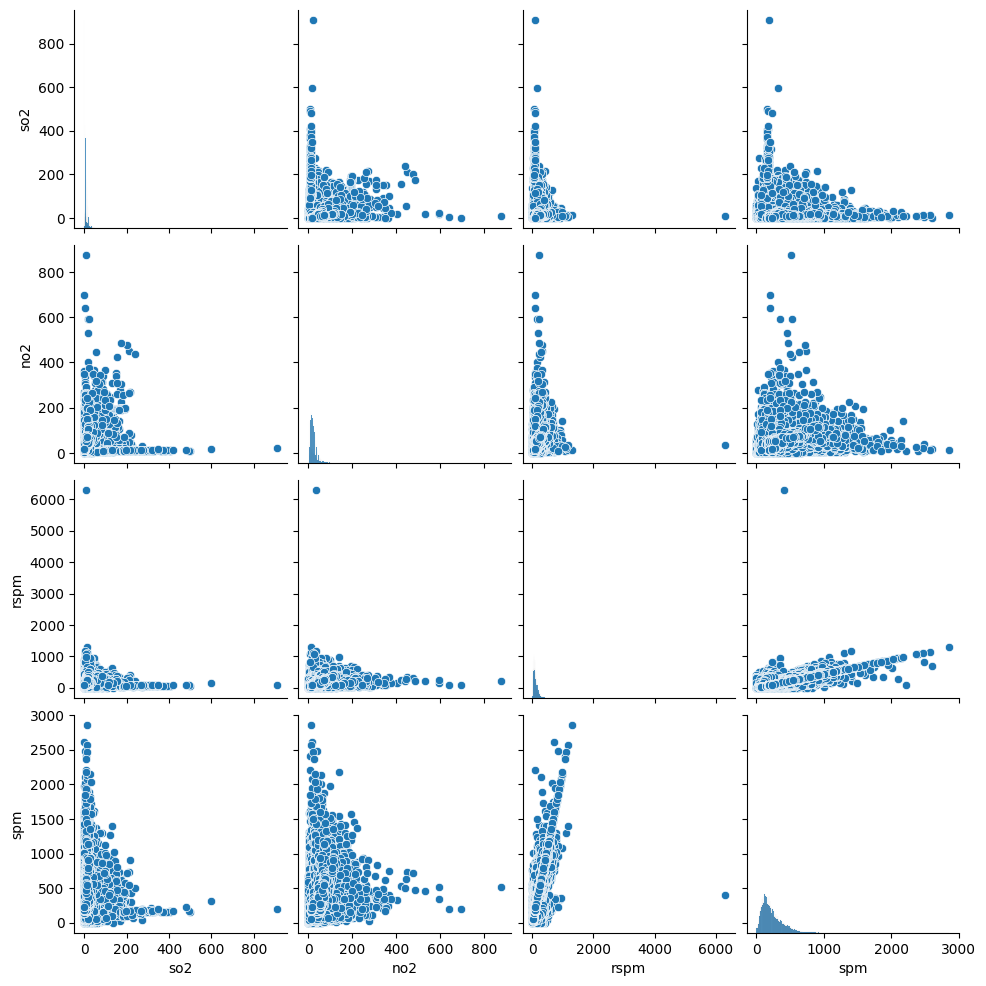

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['state'].value_counts()
# Viewing the count of values present in the state column

,count
state,
Maharashtra,58312
Uttar Pradesh,41520
Andhra Pradesh,25610
Punjab,25027
Rajasthan,24899
Kerala,23844
West Bengal,22355
Himachal Pradesh,22200
Gujarat,20621


[]

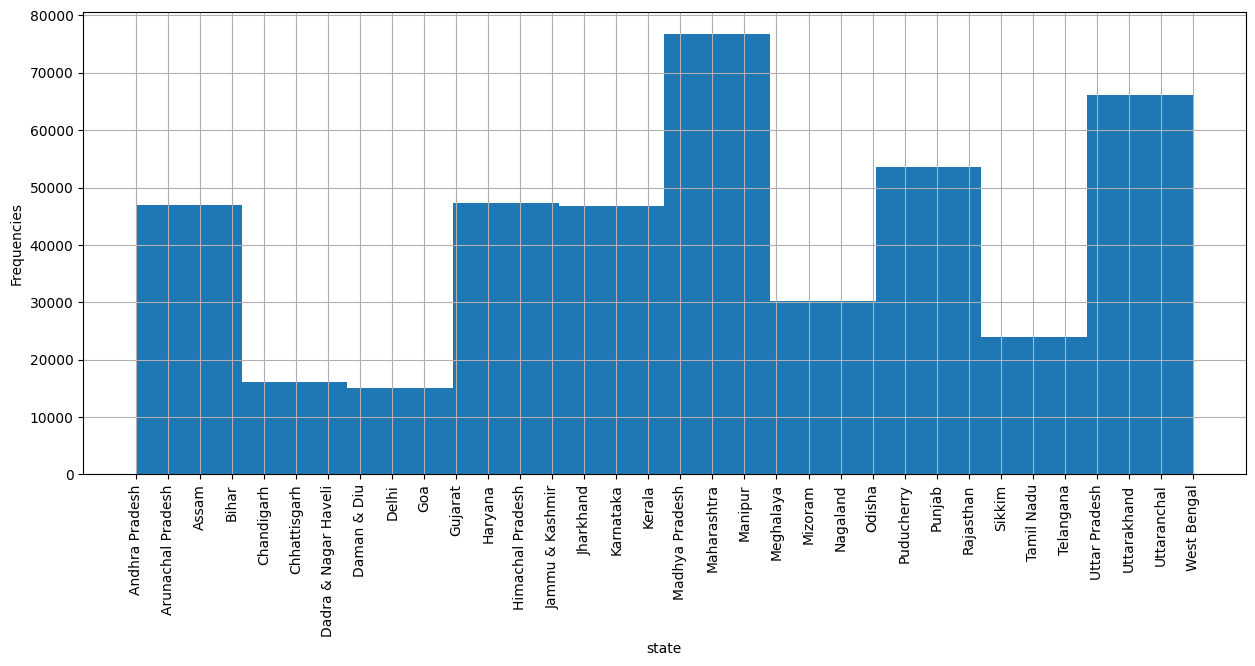

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [ ]:
df['type'].value_counts()
# Viewing the count of values present in the type column

,count
type,
"Residential, Rural and other Areas",261329
Industrial Area,145263
Sensitive Area,14757
RIRUO,1304


[]

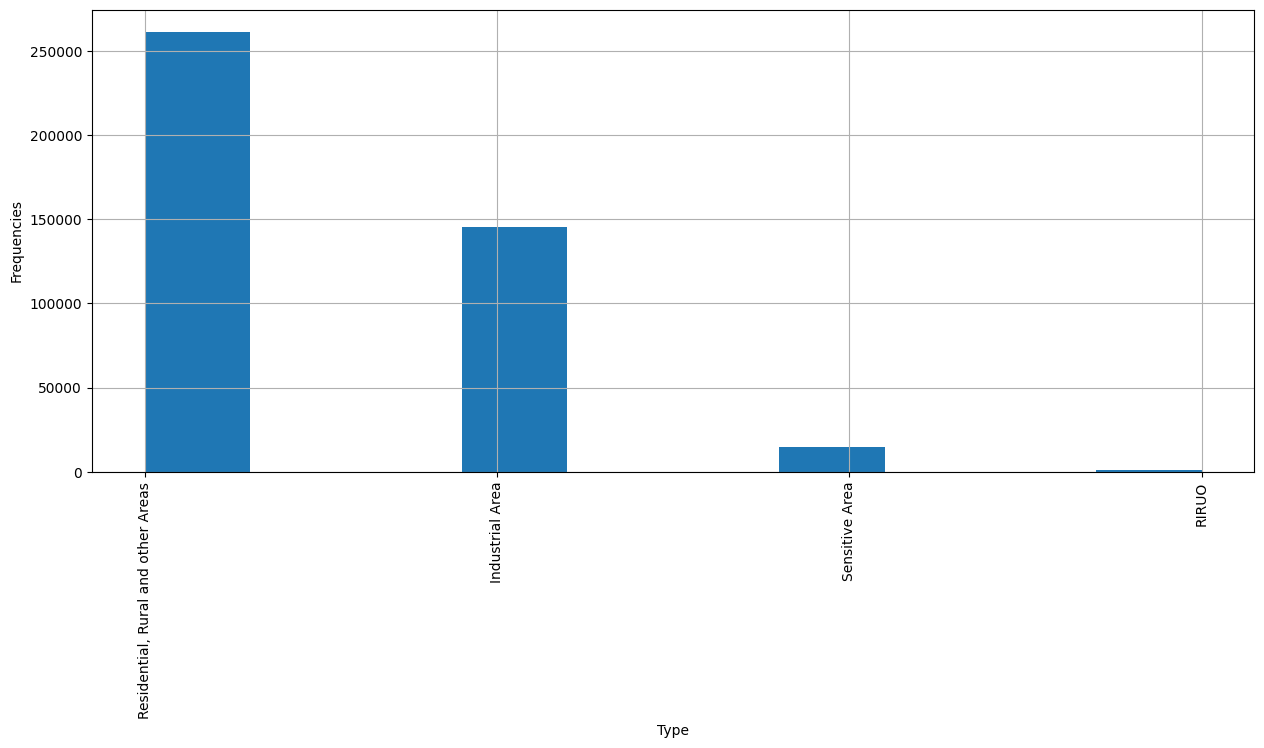

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [ ]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

,count
agency,
Maharashtra State Pollution Control Board,27775
Uttar Pradesh State Pollution Control Board,22445
Andhra Pradesh State Pollution Control Board,19069
Punjab State Pollution Control Board,15135
Himachal Pradesh State Environment Proection & Pollution Control Board,14932
Kerala State Pollution Control Board,13782
Rajasthan State Pollution Control Board,13478
Assam State Pollution Control Board,13424
West Bengal State Pollution Control Board,12044


[]

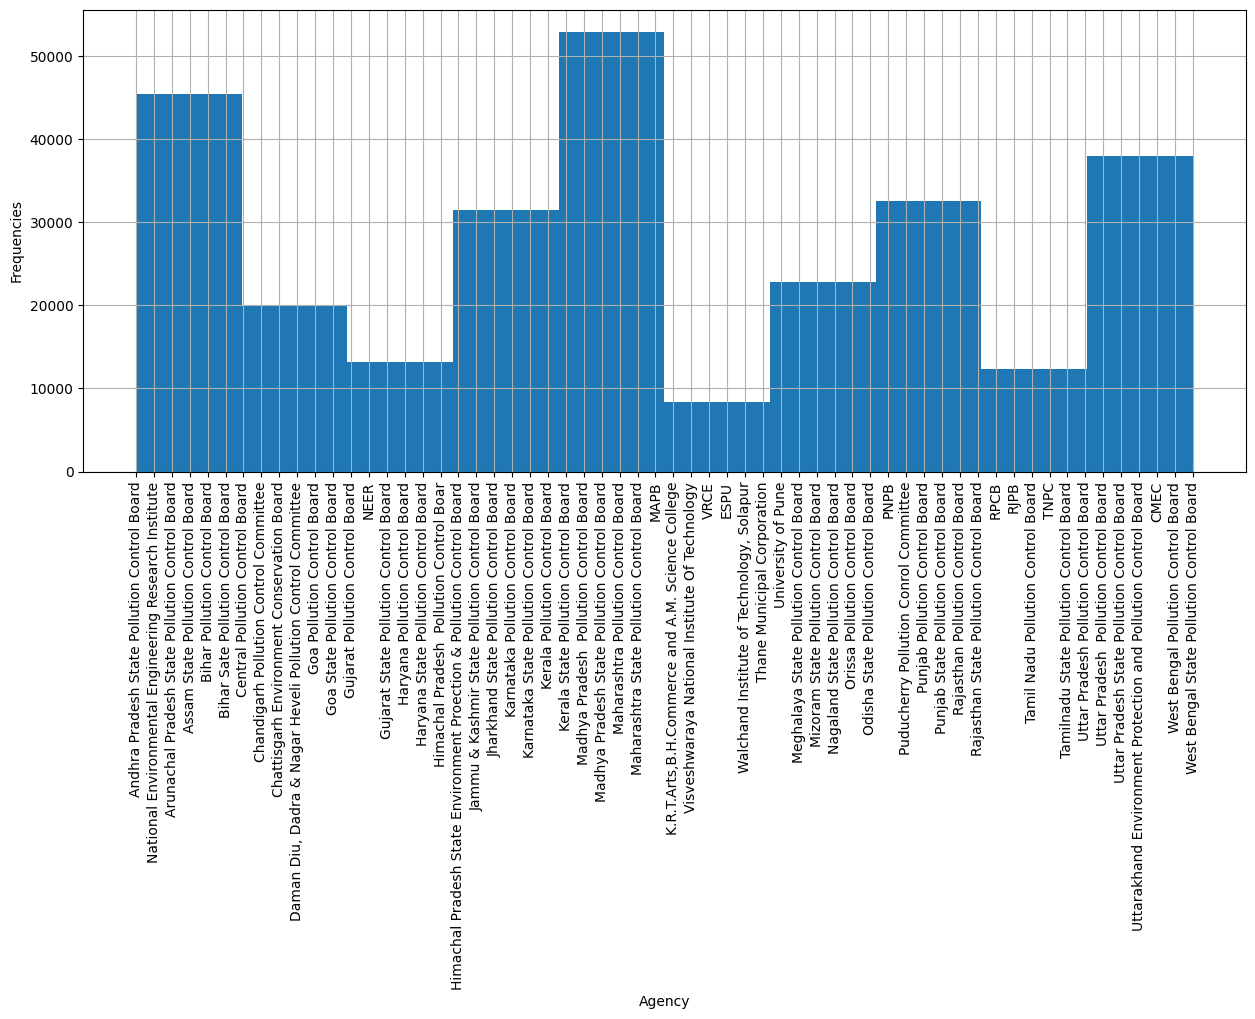

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

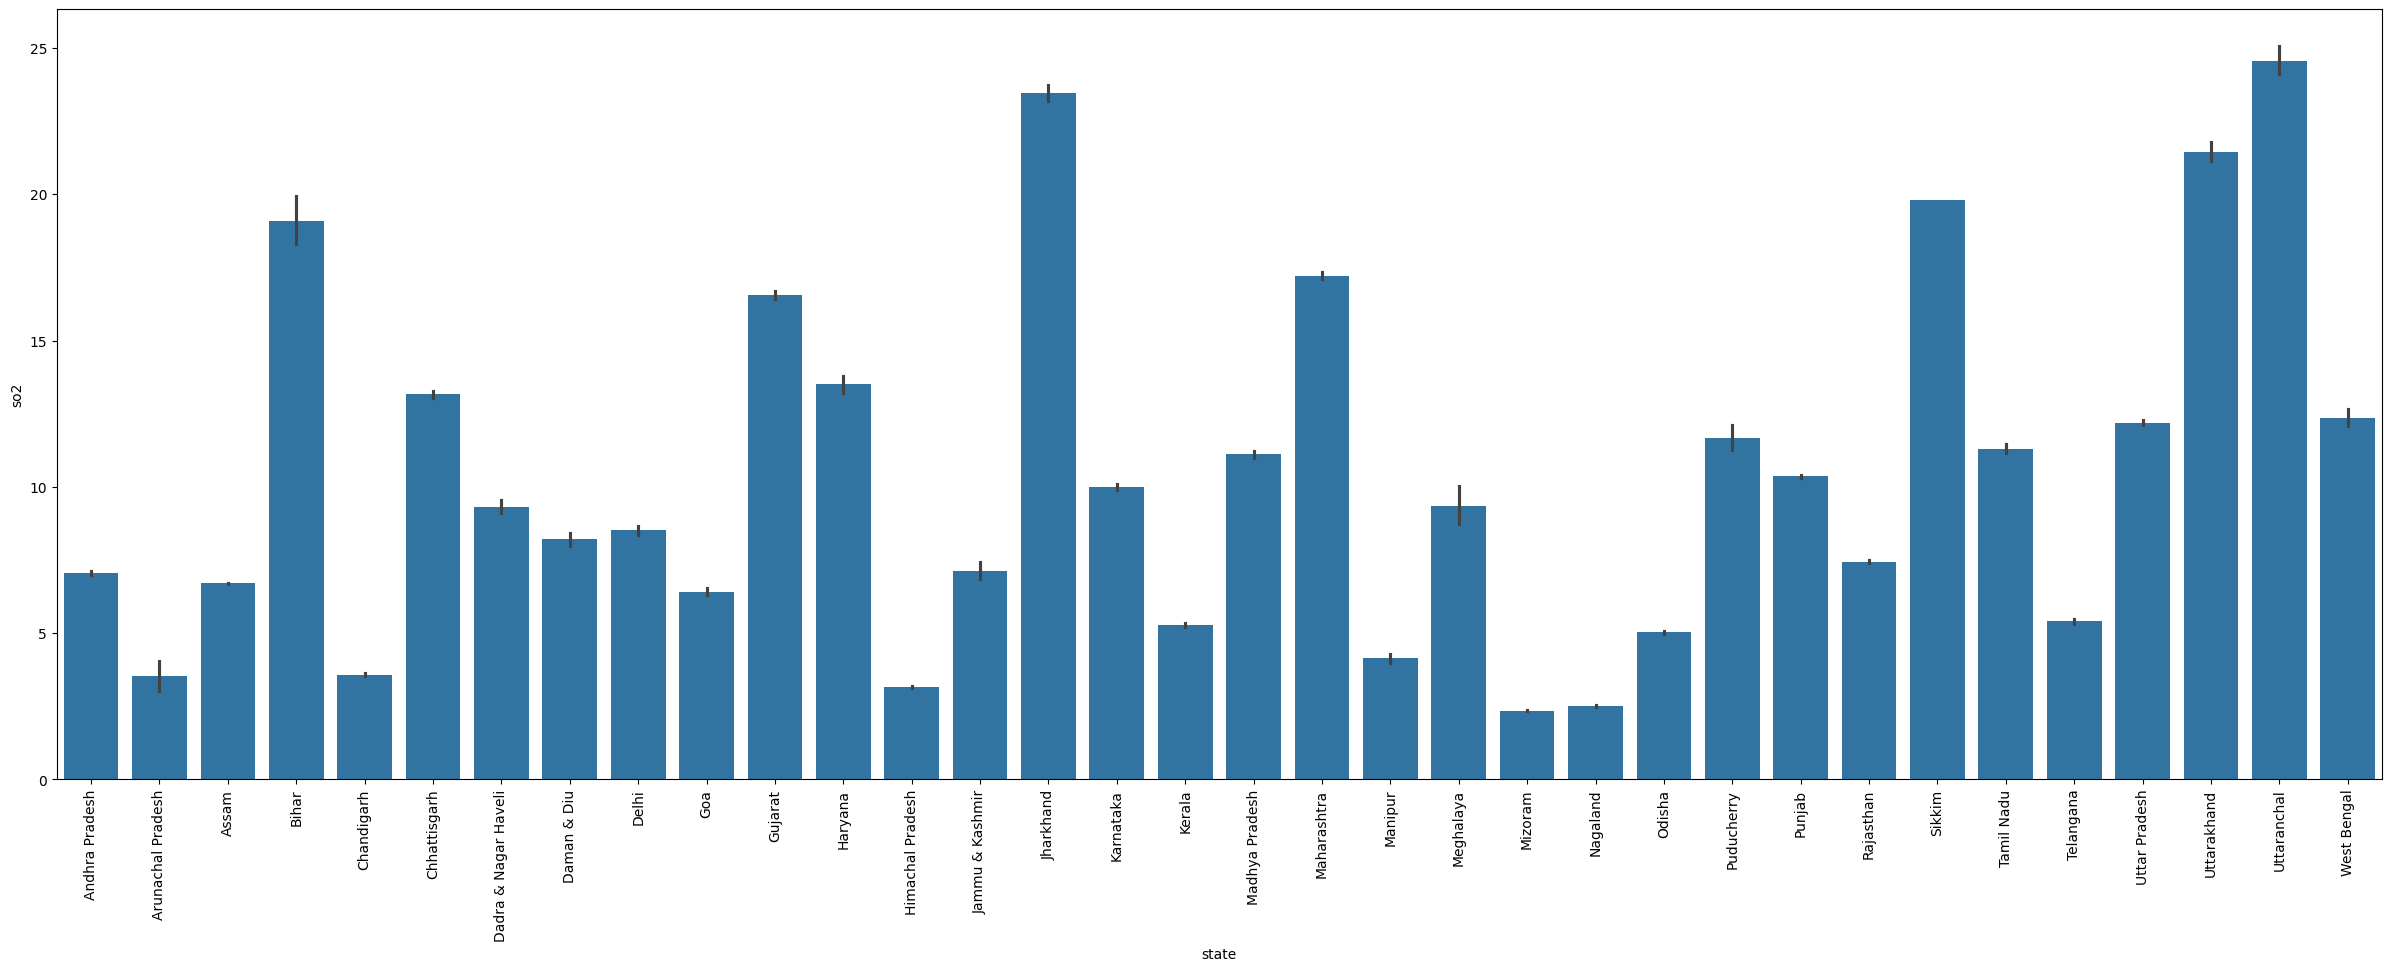

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

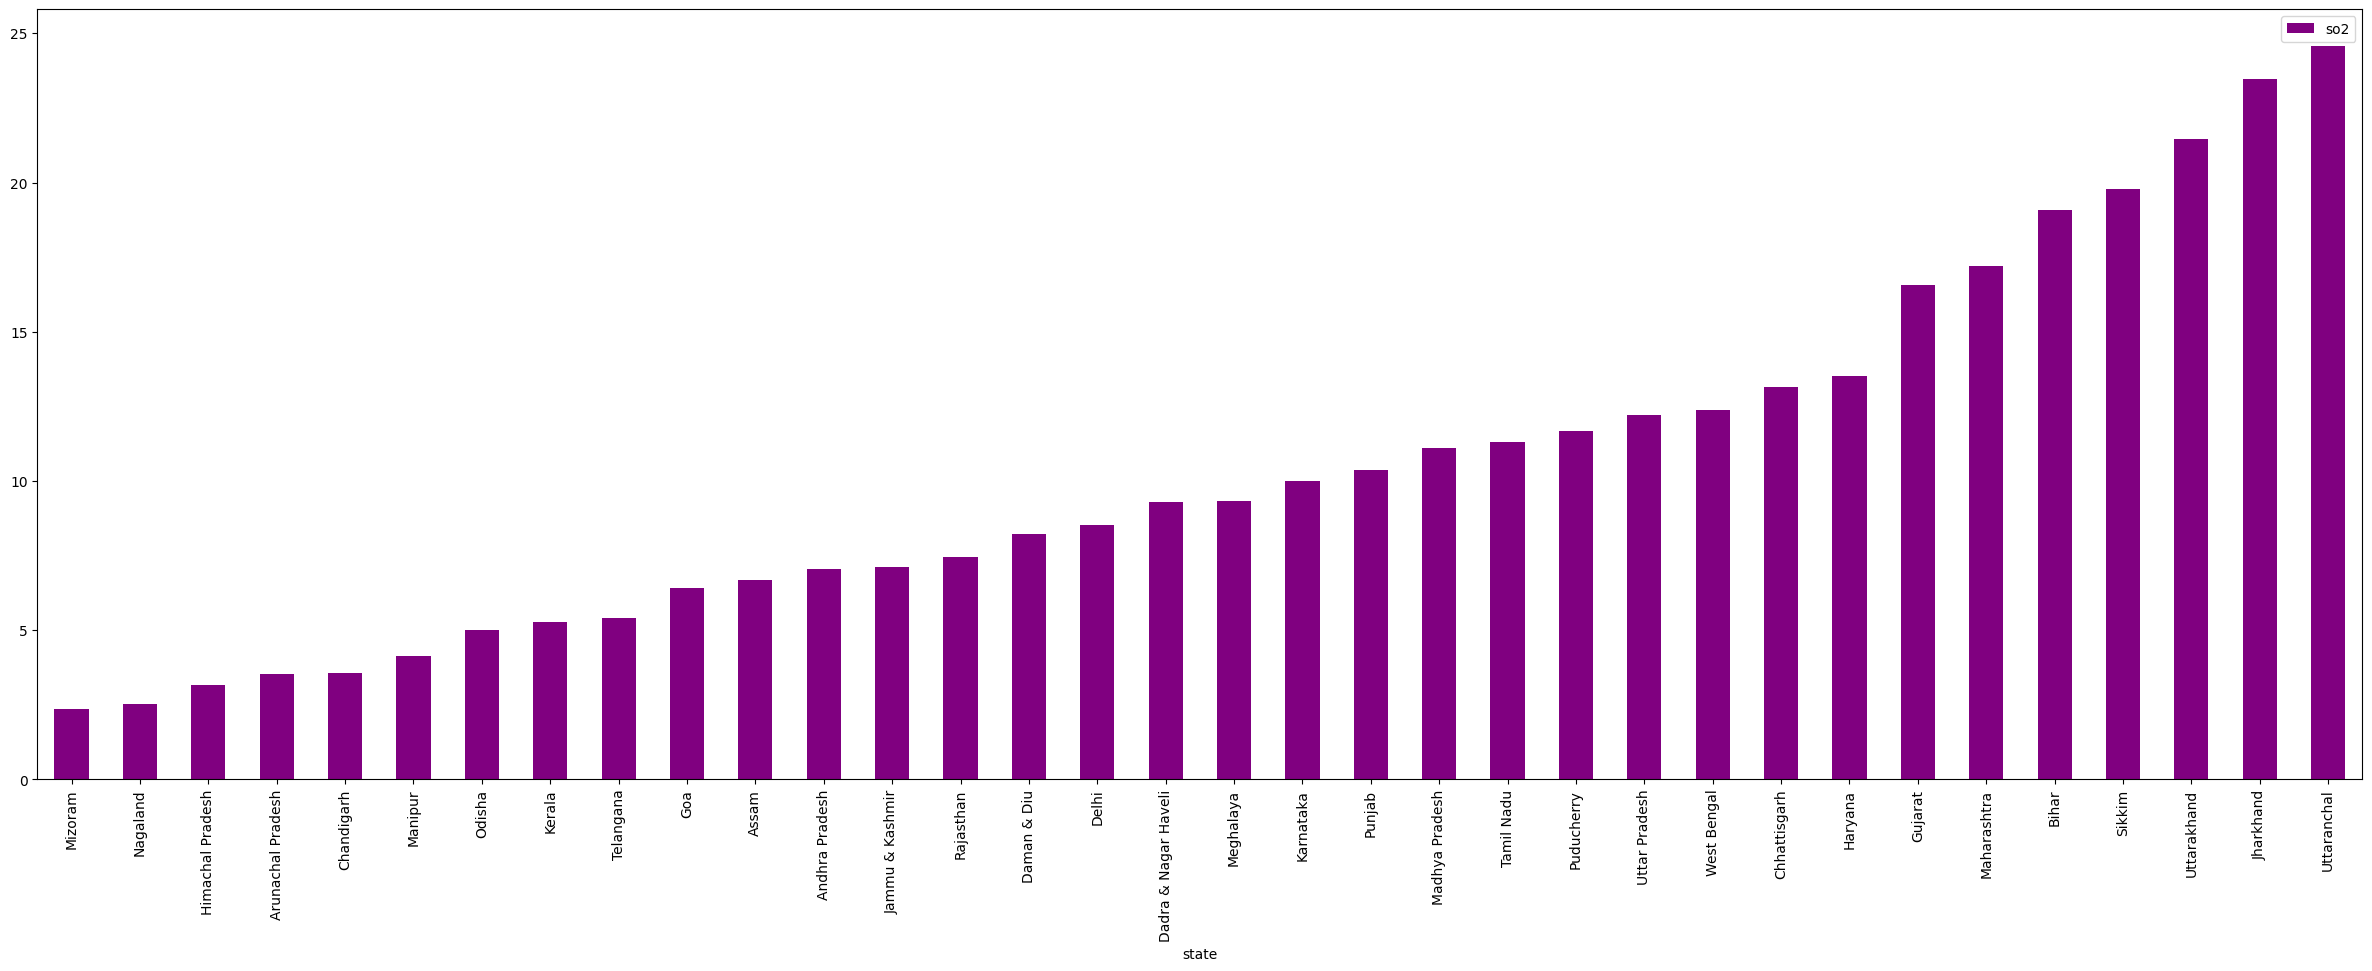

In [ ]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

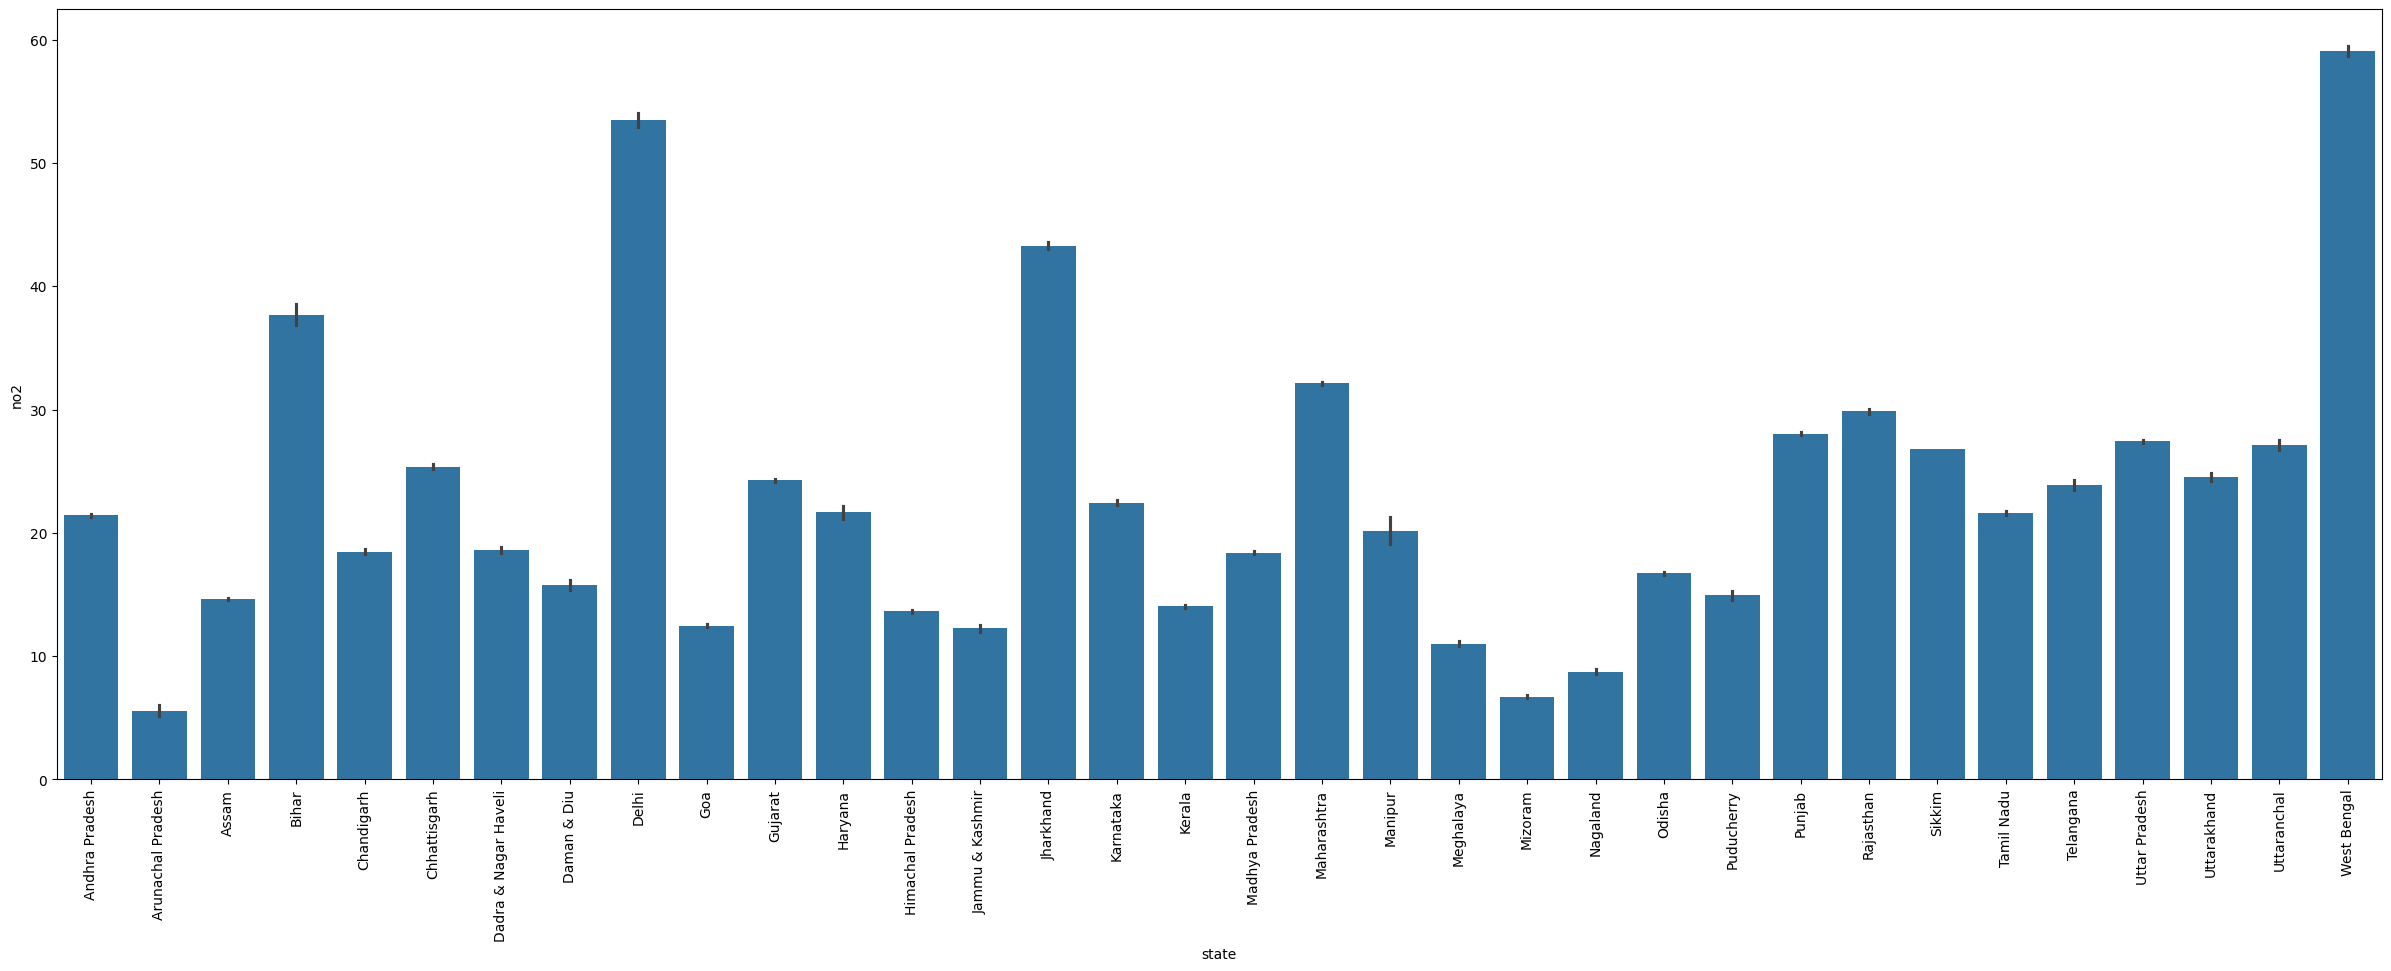

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states

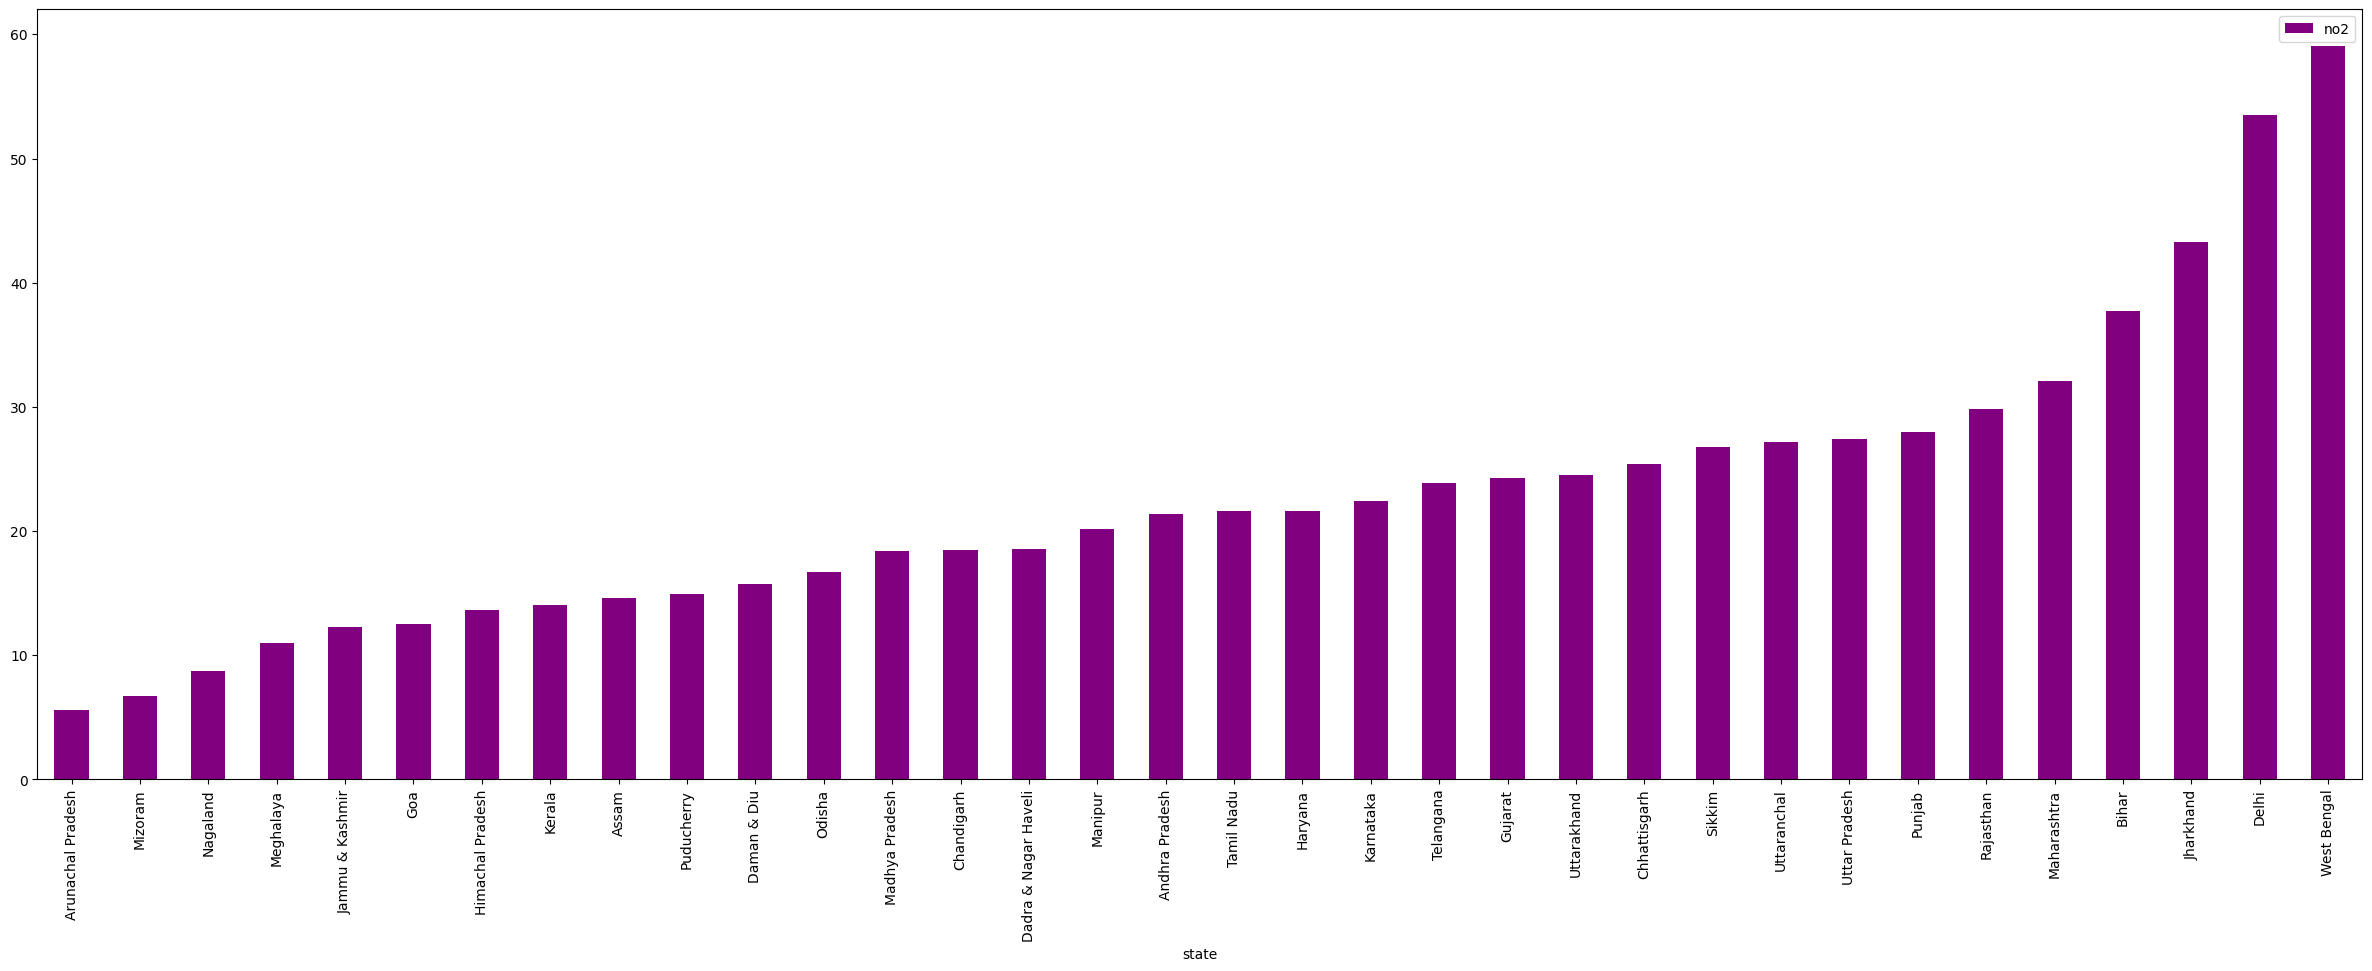

In [ ]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

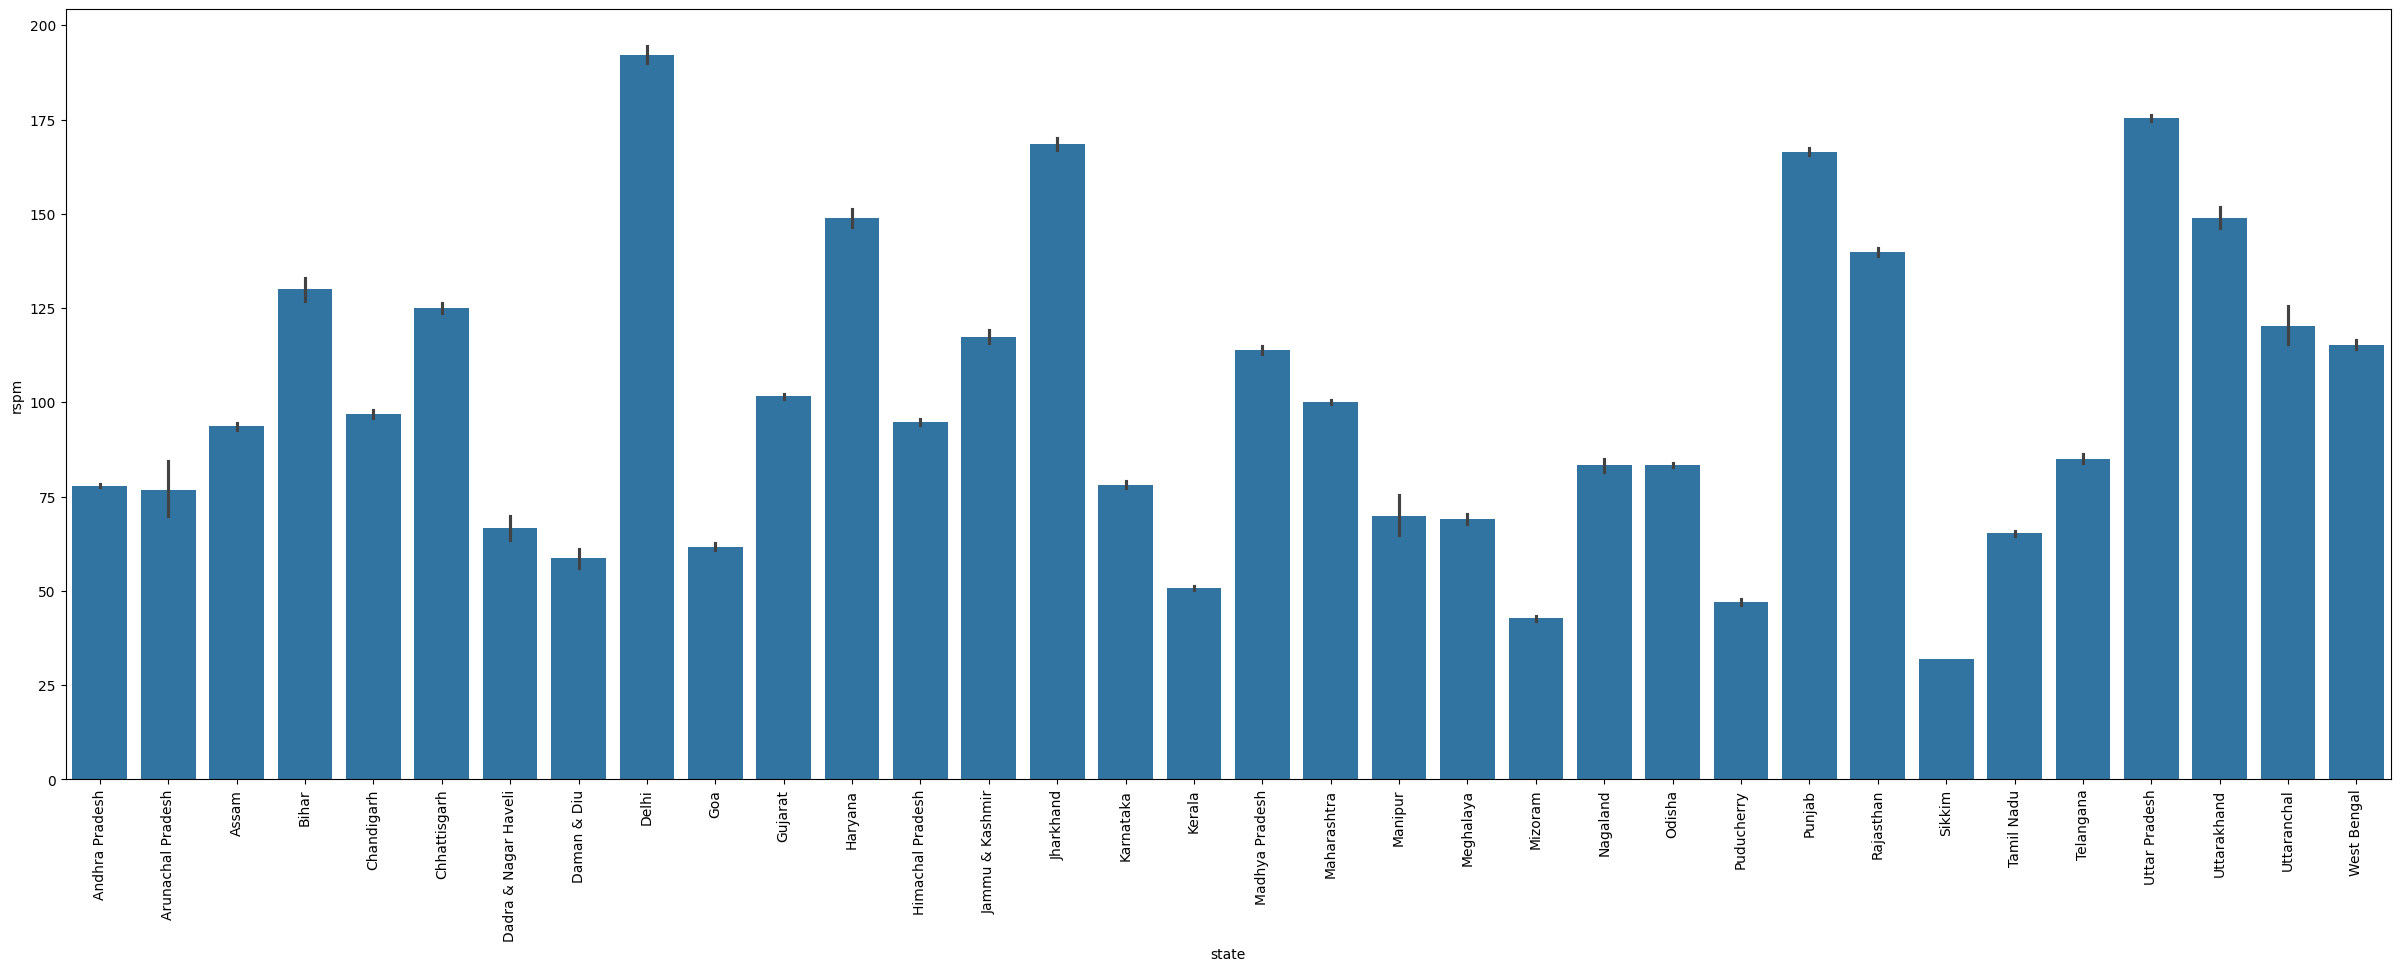

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states

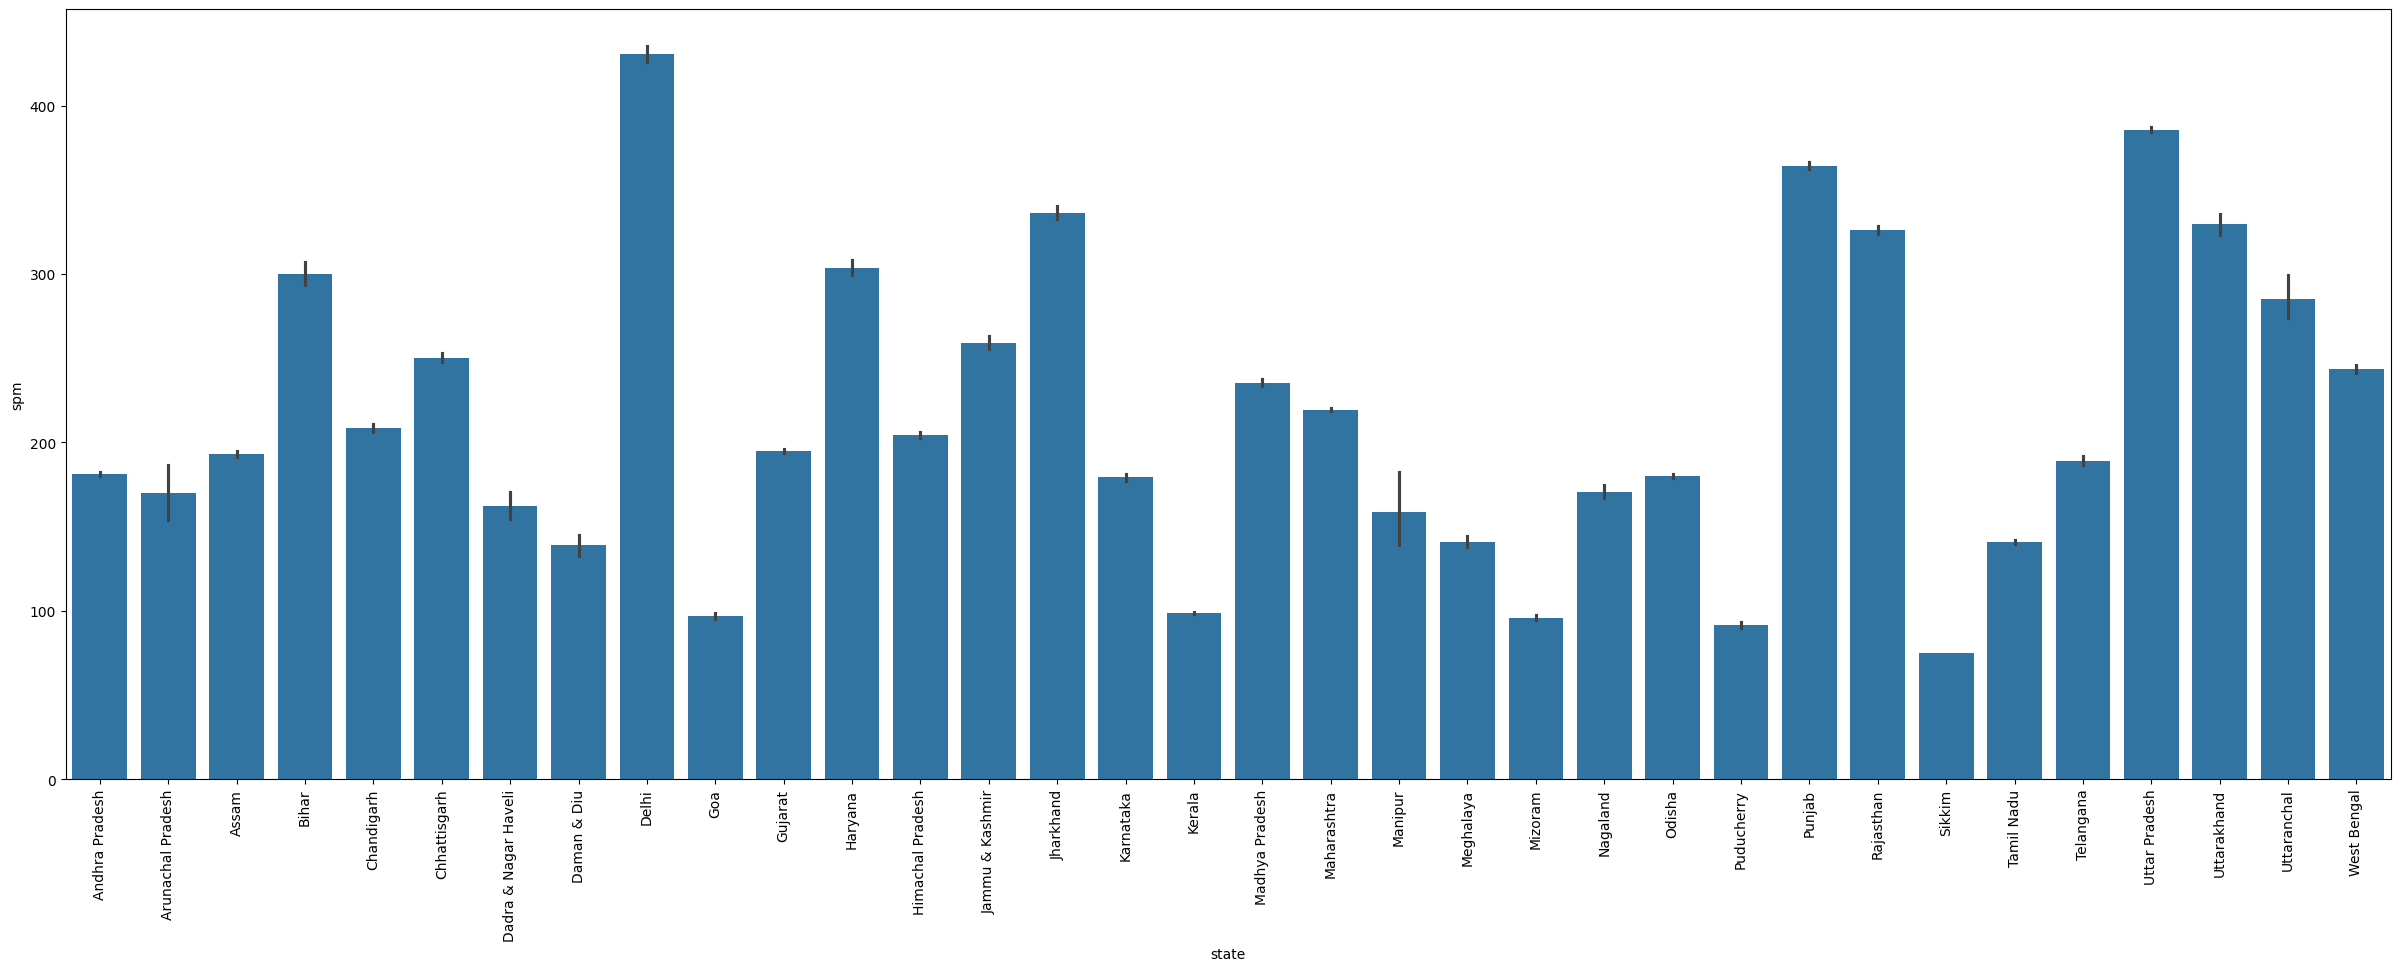

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states

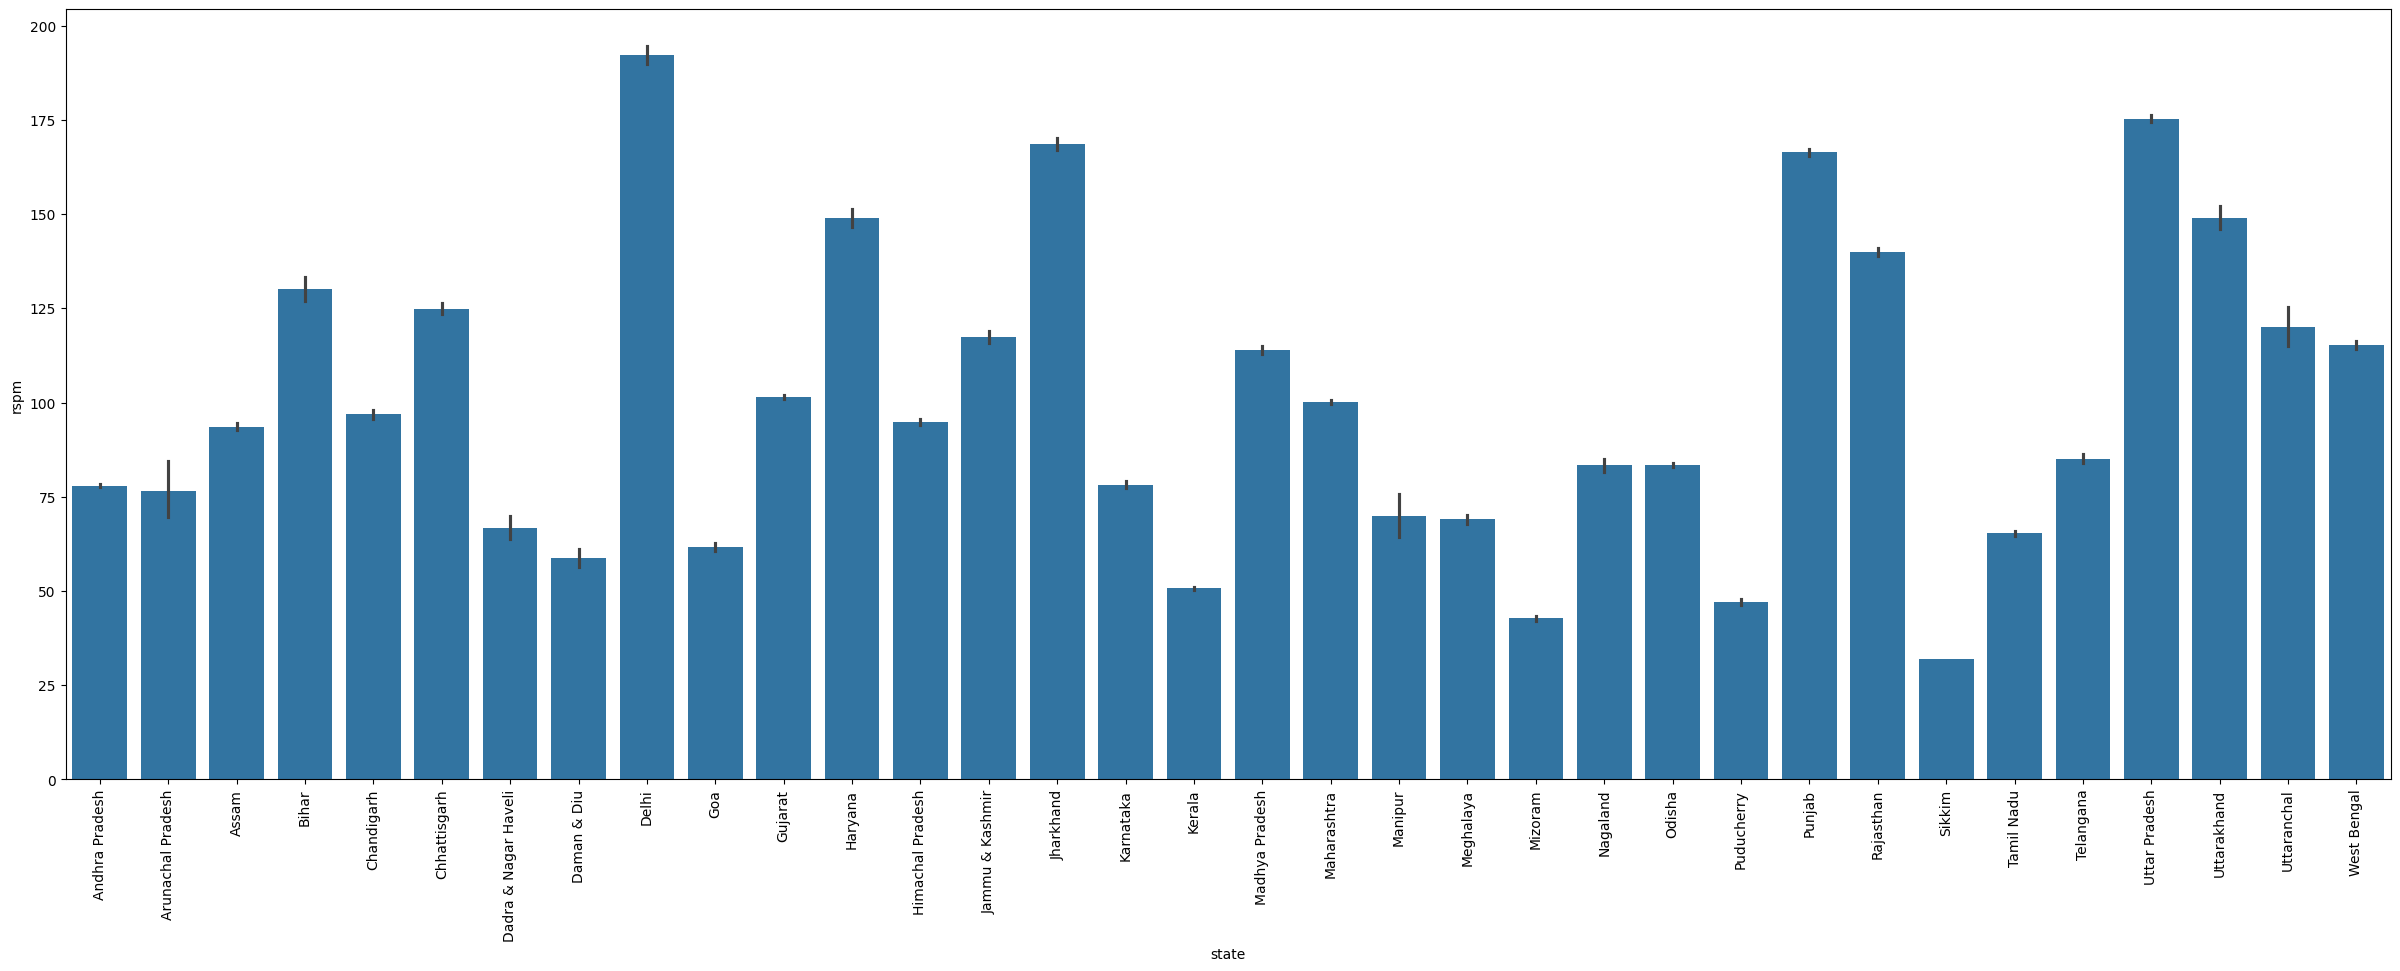

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspmlevel compared to other states

In [ ]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [ ]:
nullvalues
# higher null values present in pm2_5 followed by spm

,0
agency,145885
stn_code,141044
location_monitoring_station,19871
date,4
location,0
state,0
sampling_date,0
type,0
no2,0
so2,0


In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [ ]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [ ]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
agency,145885,34.516495
stn_code,141044,33.371111
location_monitoring_station,19871,4.701493
date,4,0.000946
location,0,0.000000
state,0,0.000000
sampling_date,0,0.000000
type,0,0.000000
no2,0,0.000000
so2,0,0.000000


In [ ]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [ ]:
df.isnull().sum()
# Now checking the null values

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0


In [ ]:
df

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,59.85,133.000000
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,36.90,82.000000
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,49.95,111.000000
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,53.10,118.000000
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,60.75,135.000000
...,...,...,...,...,...,...,...
422648,West Bengal,Asansol,Industrial Area,10.0,73.0,253.00,562.222222
422649,West Bengal,Barrackpore,Industrial Area,8.0,54.0,122.00,271.111111
422650,West Bengal,Durgapur,"Residential, Rural and other Areas",9.0,65.0,216.00,480.000000
422651,West Bengal,Raniganj,Industrial Area,12.0,72.0,248.00,551.111111


In [ ]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [ ]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [ ]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0


In [ ]:
df
# The following features are important for our machine learning models.

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,59.85,133.000000
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,36.90,82.000000
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,49.95,111.000000
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,53.10,118.000000
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,60.75,135.000000
...,...,...,...,...,...,...,...
422648,West Bengal,Asansol,Industrial Area,10.0,73.0,253.00,562.222222
422649,West Bengal,Barrackpore,Industrial Area,8.0,54.0,122.00,271.111111
422650,West Bengal,Durgapur,"Residential, Rural and other Areas",9.0,65.0,216.00,480.000000
422651,West Bengal,Raniganj,Industrial Area,12.0,72.0,248.00,551.111111


In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,3.9,4.875
1,5.6,7.000
2,3.3,4.125
3,3.9,4.875
4,3.5,4.375


In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,14.1,17.625
1,11.8,14.750
2,19.3,24.125
3,8.2,10.250
4,12.1,15.125


In [ ]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,59.85,0.0
1,36.90,0.0
2,49.95,0.0
3,53.10,0.0
4,60.75,0.0


In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,133.0,122.000000
1,82.0,82.000000
2,111.0,107.333333
3,118.0,112.000000
4,135.0,123.333333


In [ ]:
### function to calculate the air quality index (AQI) of every data value
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,4.875,17.625,0.0,122.000000,122.000000
1,Andhra Pradesh,7.000,14.750,0.0,82.000000,82.000000
2,Andhra Pradesh,4.125,24.125,0.0,107.333333,107.333333
3,Andhra Pradesh,4.875,10.250,0.0,112.000000,112.000000
4,Andhra Pradesh,4.375,15.125,0.0,123.333333,123.333333


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,14.1,59.85,133.0,4.875,17.625,0.0,122.000000,122.000000,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,5.6,11.8,36.90,82.0,7.000,14.750,0.0,82.000000,82.000000,Moderate
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.3,19.3,49.95,111.0,4.125,24.125,0.0,107.333333,107.333333,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.9,8.2,53.10,118.0,4.875,10.250,0.0,112.000000,112.000000,Poor
4,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",3.5,12.1,60.75,135.0,4.375,15.125,0.0,123.333333,123.333333,Poor


In [ ]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

,count
AQI_Range,
Poor,193817
Unhealthy,69010
Moderate,60198
Hazardous,48608
Very unhealthy,34686
Good,16334


In [ ]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,4.875,17.625,0.0,122.000000
1,7.000,14.750,0.0,82.000000
2,4.125,24.125,0.0,107.333333
3,4.875,10.250,0.0,112.000000
4,4.375,15.125,0.0,123.333333


In [ ]:
Y.head()
# the AQI column is the target column

,AQI
0,122.000000
1,82.000000
2,107.333333
3,112.000000
4,123.333333


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(338122, 4) (84531, 4) (338122,) (84531,)


In [ ]:
# Linear Regression
model=LinearRegression()
model.fit(X_train,Y_train)
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  3.2841828032675684
RMSE TestData =  3.3500913269686787
--------------------------------------------------
RSquared value on train: 0.9992013285711495
RSquared value on test: 0.9991647599565989


In [ ]:
## Decision Tree Regressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))


RMSE TrainingData =  7.523273038126383e-10
RMSE TestData =  1.541299806904007
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998232040702878


In [ ]:
## Random Forest Regressor
RF=RandomForestRegressor().fit(X_train,Y_train)
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.45359502618260017
RMSE TestData =  1.4551012854642105
--------------------------------------------------
RSquared value on train: 0.9999847647329679


Classification Algorithms


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

In [ ]:
# Logistic Regression
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

log_reg.predict([[727,327.55,78.2,100]])

log_reg.predict([[2.7,45,35.16,23]])

log_reg.predict([[10,2.8,82,20]])

log_reg.predict([[2,45.8,37,32]])

Model accuracy on train is:  0.5312860860875
Model accuracy on test is:  0.5310017494049155
--------------------------------------------------
KappaScore is:  0.2653645112872086


array(['Poor'], dtype=object)

In [ ]:
# Decision Tree Classifier
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998781152312942
--------------------------------------------------
KappaScore is:  0.9998309229421947


In [ ]:
#Random Forest Classifier
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999498121540623
--------------------------------------------------
KappaScore is:  0.9999303794571858


In [ ]:
#K-Nearest Neighbours
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

KNN.predict([[7.4,47.7,78.182,100]])
# Predictions on random values

KNN.predict([[1,1.2,3.12,0]])
# Predictions on random values

KNN.predict([[325.7,345,798.182,203]])
# Predictions on random values

Model accuracy on train is:  0.9981107222691108
Model accuracy on test is:  0.9967521293986062
--------------------------------------------------
KappaScore is:  0.9954944911075567


array(['Unhealthy'], dtype=object)